In [11]:
# Import necessary libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [53]:
# Download 20 years of financial data for these tickers.
tickers = ['AAPL','MSFT','GOOGL','AMZN','TSLA','NVDA','JPM','V','MA','PG',
           'JNJ','UNH','HD','VZ','DIS','PYPL','ADBE','NFLX','INTC','T',
           'PFE','MRK','ABBV','KO','PEP','XOM','CVX','WMT','BAC','C',
           'CRM','ABT','ACN','TXN','AVGO','COST','DHR','LLY','MCD','NKE',
           'ORCL','QCOM','SBUX','TMO','UNP','UPS','LIN','LOW','HON']

data = yf.download(tickers, start="2004-01-01", end="2025-12-31", 
                   auto_adjust=True, threads=True)['Close']

# Save and load quickly
data.to_pickle("tickers_20y.pkl")
data = pd.read_pickle("tickers_20y.pkl")

data.head()

[*********************100%***********************]  49 of 49 completed


Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMZN,AVGO,BAC,C,COST,...,TMO,TSLA,TXN,UNH,UNP,UPS,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0.319105,NaN,11.766493,18.117292,19.518396,2.5950,NaN,23.748632,293.463593,24.264616,...,23.721712,NaN,18.178305,23.086720,11.071388,37.417274,NaN,10.506692,11.399337,19.699318
2004-01-05,0.332451,NaN,11.766493,18.634523,19.867832,2.6635,NaN,23.817705,298.195007,24.151049,...,23.835440,NaN,18.562836,21.976187,11.103439,37.559521,NaN,10.810716,11.360106,20.159925
2004-01-06,0.331251,NaN,11.680923,18.417847,19.887800,2.6515,NaN,23.778666,298.494415,24.424953,...,24.043938,NaN,18.600042,22.202982,10.973640,37.330910,NaN,10.989552,11.626019,20.024166
2004-01-07,0.338749,NaN,11.804249,17.998459,19.694550,2.5950,NaN,23.724615,298.913544,24.772356,...,24.271399,NaN,18.575239,22.410234,10.757306,37.208973,NaN,11.012145,11.656531,19.878719
2004-01-08,0.350295,NaN,11.456916,17.397350,18.975481,2.5120,NaN,23.736629,300.171326,24.892591,...,24.764210,NaN,19.753635,22.457155,10.749295,36.904163,NaN,11.180820,11.608580,19.830229


In [21]:
# Daily  returns
daily_returns = data.pct_change()

# Buy and hold for 1$ for each ticker. Show 5 last days.
equity_curves_df = (1 + daily_returns).cumprod() 
equity_curves_df.tail()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMZN,AVGO,BAC,C,COST,...,TMO,TSLA,TXN,UNH,UNP,UPS,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2025-12-02,896.852981,10.736205,10.735566,14.407231,16.538755,90.335258,334.137476,2.228129,0.351628,37.998969,...,24.465766,269.510196,9.641165,14.057435,20.854595,2.554434,26.438190,3.865156,9.861098,5.857056
2025-12-03,890.460068,11.017088,10.648029,15.060199,16.742152,89.549134,333.296793,2.265830,0.363657,38.008447,...,24.469139,280.498054,10.044944,14.714522,21.123088,2.624722,26.437387,3.870867,10.036547,5.979903
2025-12-04,879.648627,10.943877,10.657378,14.866461,16.842059,88.289017,333.664595,2.268762,0.367303,36.920442,...,24.249508,285.389227,9.908517,14.445103,21.308071,2.532519,26.236067,3.927022,10.074267,5.946399
2025-12-05,873.631751,10.818030,10.630182,14.714673,17.740186,88.450866,341.729703,2.271710,0.371017,36.871811,...,24.145385,285.684330,10.041642,14.333351,21.253878,2.535459,26.568127,3.967948,10.097953,5.915941
2025-12-08,869.072161,10.776639,10.419414,14.712464,17.413058,87.595374,351.230958,2.262282,0.368785,36.437435,...,24.042024,274.759320,9.982231,14.123273,21.297233,2.573388,26.070838,3.929858,9.902328,5.881930


[*********************100%***********************]  1 of 1 completed


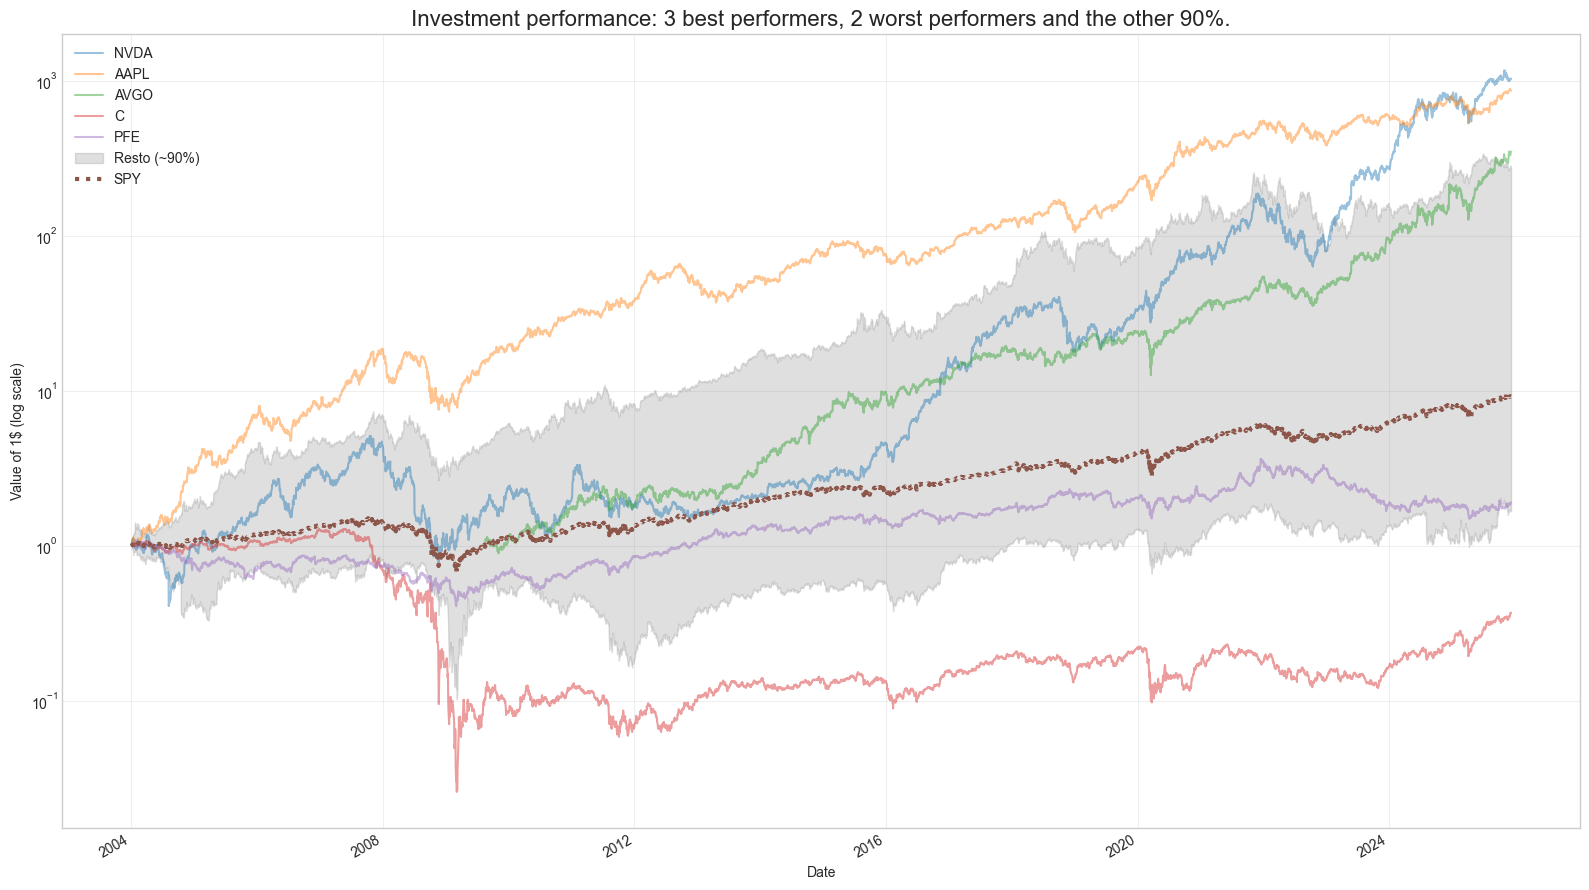

In [29]:
# Plot the equity curves
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(16, 9))

final_values = equity_curves_df.iloc[-1]
final_values = final_values[equity_curves_df.count() > 4000]

# 3 best performers
top3 = final_values.nlargest(3).index   # casi siempre NVDA, AVGO, AAPL/LLY
equity_curves_df[top3].plot(ax=ax, linewidth=1.5, alpha=0.45)

# 2 worst performers
bottom2 = final_values.nsmallest(2).index  # casi siempre INTC y T o VZ
equity_curves_df[bottom2].plot(ax=ax, linewidth=1.5, alpha=0.45)

# Rest of the tickers
others = equity_curves_df.drop(columns=top3.union(bottom2))
lower = others.min(axis=1, skipna=True)
upper = others.max(axis=1, skipna=True)
ax.fill_between(others.index, lower, upper, color="gray", alpha=0.25, label="Resto (~90%)")

# SPY returns for benchmark
spy = yf.download('SPY', start="2004-01-01", end="2025-12-31", auto_adjust=True, threads=True)['Close']
spy.to_pickle("spy.pkl")
spy = pd.read_pickle("spy.pkl")

spy_returns = spy.pct_change()
spy_equity_df = (1 + spy_returns).cumprod()
spy_equity_df = spy_equity_df.reindex(equity_curves_df.index).fillna(1.0)

spy_equity_df.plot(ax=ax, linewidth=3,linestyle=":", alpha=1)

# Aesthetics
ax.set_yscale('log')
ax.set_title("Investment performance: 3 best performers, 2 worst performers and the other 90%.", fontsize=16)
ax.set_ylabel("Value of 1$ (log scale)")
ax.legend(loc="upper left")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
# Calculate and show a table with different metrics: CAGR, Sharpe and max drawdown per stock.

# Compound annual growth rate (CAGR)
days_held = (equity_curves_df.index[-1] - equity_curves_df.index[0]).days
years_held = equity_curves_df.notna().cumsum().iloc[-1] * (days_held / 365.25) / len(equity_curves_df)

cagr = (equity_curves_df.iloc[-1] ** (1 / years_held)) - 1 

cagr

Ticker
AAPL     0.361527
ABBV     0.201894
ABT      0.112796
ACN      0.130443
ADBE     0.139164
AMZN     0.226255
AVGO     0.431698
BAC      0.037930
C       -0.044471
COST     0.178174
CRM      0.210739
CVX      0.099030
DHR      0.157463
DIS      0.082662
GOOGL    0.254552
HD       0.137216
HON      0.112974
INTC     0.036063
JNJ      0.094760
JPM      0.132853
KO       0.079512
LIN      0.133619
LLY      0.160663
LOW      0.123815
MA       0.282348
MCD      0.152984
MRK      0.074669
MSFT     0.165984
NFLX     0.285286
NKE      0.110428
NVDA     0.372727
ORCL     0.148398
PEP      0.083238
PFE      0.029836
PG       0.077376
PYPL     0.050880
QCOM     0.112852
SBUX     0.126850
T        0.084281
TMO      0.156045
TSLA     0.438701
TXN      0.110623
UNH      0.128338
UNP      0.149672
UPS      0.044046
V        0.202034
VZ       0.064400
WMT      0.110216
XOM      0.084155
Name: 2025-12-08 00:00:00, dtype: float64

In [58]:
# Sharpe ratio
irx = yf.download("^IRX", start="2004-01-01", end="2025-12-31", auto_adjust=True)['Close']

rf_daily = irx.reindex(daily_returns.index).ffill().bfill() / 100 / 252
rf_yearly = ((1 + rf_daily.mean()) ** 252 - 1).iloc[0]

yearly_returns = daily_returns.mean() * 252

sigma = daily_returns.std() * np.sqrt(252)

sharpe = (yearly_returns - rf_yearly) / sigma

sharpe

[*********************100%***********************]  1 of 1 completed


Ticker
AAPL     1.058674
ABBV     0.767951
ABT      0.522885
ACN      0.535972
ADBE     0.504823
AMZN     0.681502
AVGO     1.095240
BAC      0.268051
C        0.102991
COST     0.773948
CRM      0.627406
CVX      0.418630
DHR      0.599737
DIS      0.364049
GOOGL    0.837633
HD       0.564568
HON      0.486002
INTC     0.227577
JNJ      0.516967
JPM      0.480977
KO       0.421054
LIN      0.565491
LLY      0.638547
LOW      0.487383
MA       0.875947
MCD      0.729360
MRK      0.347007
MSFT     0.646774
NFLX     0.717252
NKE      0.448469
NVDA     0.858474
ORCL     0.548390
PEP      0.440546
PFE      0.170707
PG       0.411698
PYPL     0.278361
QCOM     0.434430
SBUX     0.486879
T        0.399222
TMO      0.618508
TSLA     0.888295
TXN      0.444939
UNH      0.487831
UNP      0.586405
UPS      0.229939
V        0.729311
VZ       0.324998
WMT      0.535846
XOM      0.375907
dtype: float64

In [52]:
# Maximum drawdown

highest_highs = equity_curves_df.cummax()
max_drawdowns = (equity_curves_df / highest_highs - 1).min() 

max_drawdowns

Ticker
AAPL    -0.608668
ABBV    -0.450898
ABT     -0.338768
ACN     -0.410214
ADBE    -0.667083
AMZN    -0.652549
AVGO    -0.483000
BAC     -0.934457
C       -0.980002
COST    -0.480379
CRM     -0.704958
CVX     -0.557739
DHR     -0.456899
DIS     -0.607152
GOOGL   -0.652948
HD      -0.556320
HON     -0.617125
INTC    -0.707973
JNJ     -0.343991
JPM     -0.681483
KO      -0.405954
LIN     -0.517563
LLY     -0.576942
LOW     -0.605929
MA      -0.626653
MCD     -0.368986
MRK     -0.633014
MSFT    -0.579420
NFLX    -0.819904
NKE     -0.685343
NVDA    -0.850784
ORCL    -0.411139
PEP     -0.404067
PFE     -0.626577
PG      -0.390101
PYPL    -0.836677
QCOM    -0.480262
SBUX    -0.819077
T       -0.443911
TMO     -0.539075
TSLA    -0.736322
TXN     -0.638156
UNH     -0.743974
UNP     -0.594365
UPS     -0.579177
V       -0.519047
VZ      -0.425156
WMT     -0.364352
XOM     -0.623960
dtype: float64

In [64]:
# Rolling sharpe for 252 days 

rf_daily = rf_yearly / 252
excess_returns = daily_returns - rf_daily
rol_sharpe = ((excess_returns.rolling(window=252).mean() * 252) / (excess_returns.rolling(window=252).std() * np.sqrt(252)))

rol_sharpe

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMZN,AVGO,BAC,C,COST,...,TMO,TSLA,TXN,UNH,UNP,UPS,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-02,0.728317,0.982859,0.393485,-0.996966,-1.275263,0.498714,1.750766,0.559739,1.428447,-0.144287,...,0.447868,0.686916,-0.085192,-1.037298,-0.102224,-0.756396,0.276411,-0.078649,0.899204,0.114813
2025-12-03,0.675153,1.082009,0.362849,-0.831538,-1.250554,0.443770,1.721166,0.641890,1.498120,-0.193659,...,0.401364,0.692678,-0.003161,-0.941888,-0.034302,-0.670276,0.270760,-0.067397,0.941324,0.193442
2025-12-04,0.608389,1.080803,0.443614,-0.865443,-1.233899,0.364397,1.678082,0.683959,1.506415,-0.339898,...,0.371481,0.667073,-0.046405,-0.973403,0.075575,-0.735829,0.213127,0.053436,0.950192,0.173345


In [65]:
#Table to show metrics

rolling_sharpe_latest = rol_sharpe.iloc[-1]

metrics_table = pd.DataFrame({
    'CAGR (%)': (cagr * 100).round(2),
    'Calmar ratio': (cagr / -max_drawdowns).round(2),
    'Max drawdown (%)': (max_drawdowns * 100).round(2),
    'Sharpe ratio': sharpe.round(2),
    'Rolling Sharpe 252d': rolling_sharpe_latest.round(2),
    'Current Vol 252d (%)': (daily_returns.rolling(252).std().iloc[-1] * np.sqrt(252) * 100).round(2)
})


metrics_table = metrics_table.sort_values('Rolling Sharpe 252d', ascending=False)

styled_table = (metrics_table
    .style
    .set_properties(**{'font-size': '13pt', 'font-family': 'Calibri, Arial', 'text-align': 'center'})
    .set_table_styles([
        {'selector': 'th', 
         'props': [('background-color', '#e8e8e8'), ('color', '#333333'), ('font-weight', 'bold'), ('padding', '12px')]},
        {'selector': 'td', 
         'props': [('padding', '10px'), ('border-bottom', '1px solid #ddd')]},
        {'selector': 'caption', 
         'props': [('font-size', '20pt'), ('font-weight', 'bold'), ('color', '#2b2b2b'), ('margin-bottom', '15px')]}
    ])
    .background_gradient(cmap='Blues', subset=['Calmar ratio'], low=0.4, high=1.0)
    .bar(subset=['Max drawdown (%)'], color='#ffb3b3', height=70)
    .bar(subset=['Current Vol 252d (%)'], color='#e6e6e6', height=60)
    .background_gradient(cmap='Greys', subset=['Rolling Sharpe 252d'], low=0.4, high=0.9)
    .format('{:.1f}', subset=['CAGR (%)', 'Max drawdown (%)', 'Current Vol 252d (%)'])
    .format('{:.2f}', subset=['Sharpe ratio', 'Rolling Sharpe 252d', 'Calmar ratio'])
    .set_caption("Metrics highlight")
)

display(styled_table)

,CAGR (%),Calmar ratio,Max drawdown (%),Sharpe ratio,Rolling Sharpe 252d,Current Vol 252d (%)
Ticker,,,,,,
GOOGL,25.5,0.39,-65.3,0.84,1.88,33.4
AVGO,43.2,0.89,-48.3,1.10,1.72,59.1
JNJ,9.5,0.28,-34.4,0.52,1.71,19.3
C,-4.5,-0.05,-98.0,0.10,1.51,31.4
INTC,3.6,0.05,-70.8,0.23,1.22,64.2
JPM,13.3,0.19,-68.2,0.48,1.19,24.3
ABBV,20.2,0.45,-45.1,0.77,1.14,25.9
KO,8.0,0.20,-40.6,0.42,0.82,17.5
WMT,11.0,0.30,-36.4,0.54,0.80,25.2


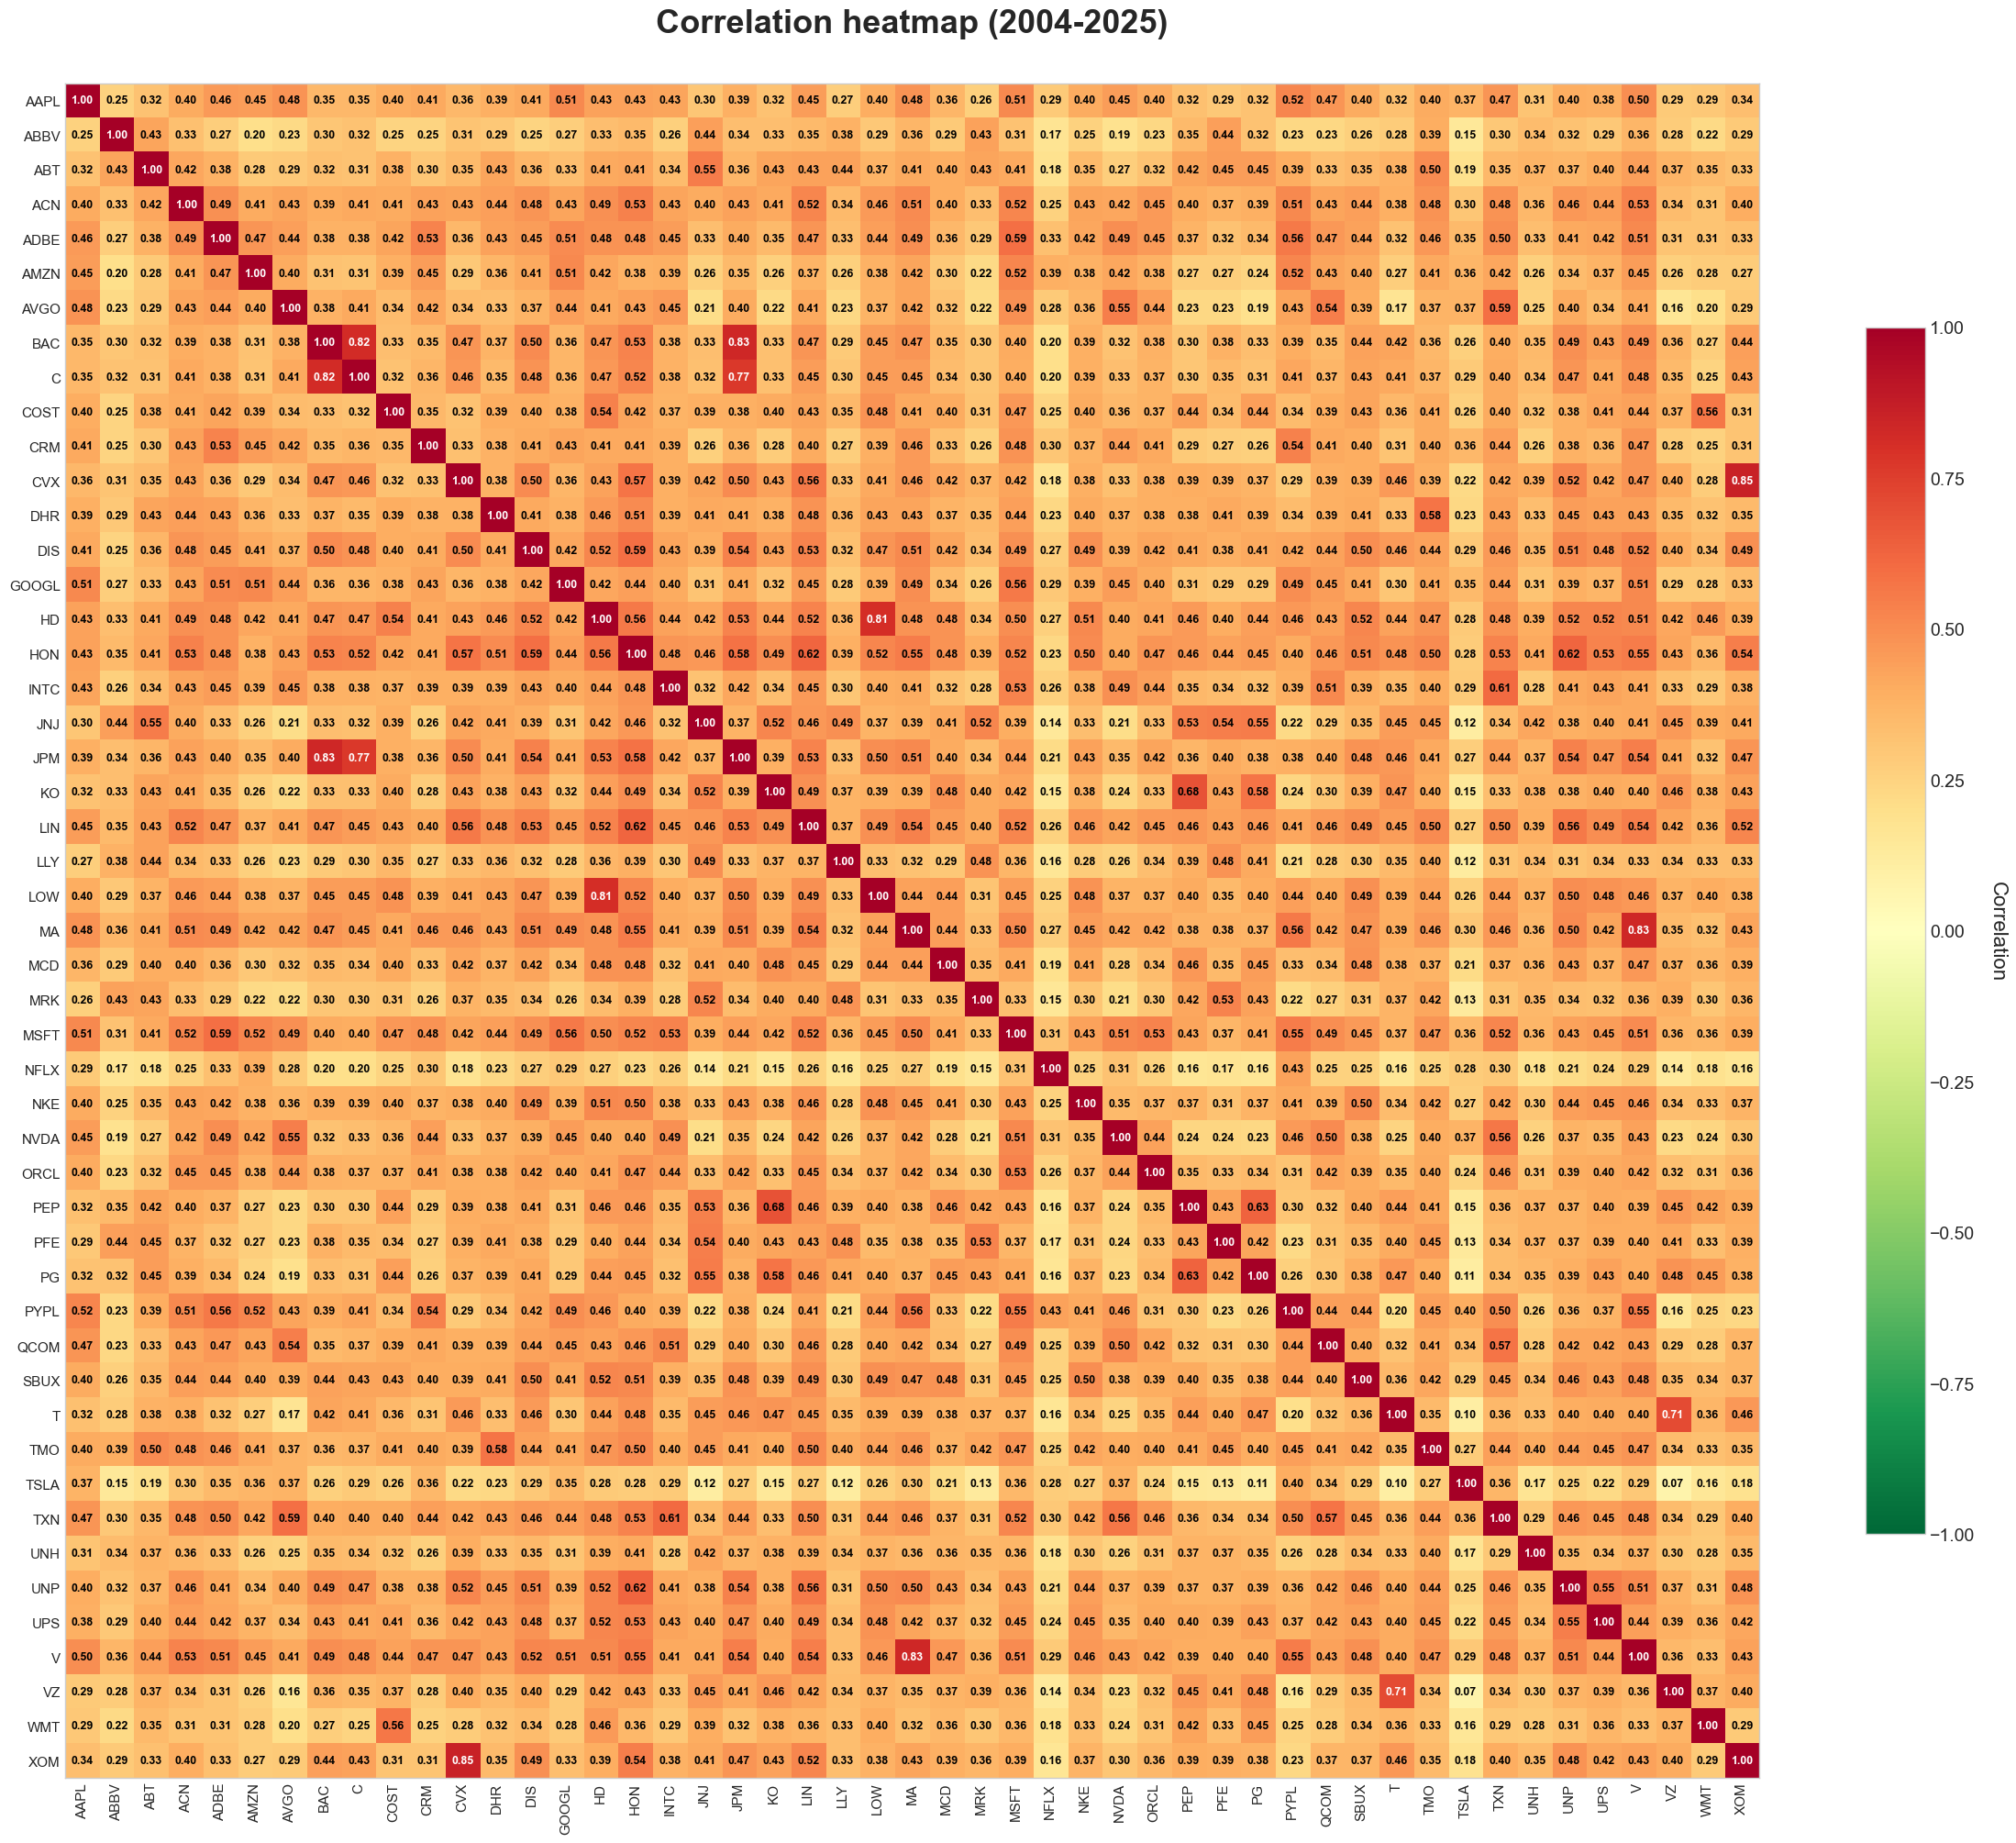

In [67]:
# Correlation heatmap

corr = daily_returns.corr()

plt.figure(figsize=(24, 20))

im = plt.imshow(corr, cmap='RdYlGn_r', vmin=-1, vmax=1, interpolation='nearest') 

cbar = plt.colorbar(im, shrink=0.7, aspect=20) # Legend
cbar.set_label('Correlation', rotation=270, labelpad=25, fontsize=16)
cbar.ax.tick_params(labelsize=14)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=11) # Tickers
plt.yticks(range(len(corr.index)), corr.index, fontsize=11)

plt.grid(True, which='major', color='white', linewidth=1.5)
plt.grid(False)

for i in range(len(corr)): #Colored numbers inside cells 
    for j in range(len(corr)):
        value = corr.iloc[i, j]
        color = "white" if abs(value) > 0.7 else "black"
        plt.text(j, i, f'{value:.2f}', 
                 ha='center', va='center', 
                 color=color, fontsize=9, fontweight='bold')
        
plt.title("Correlation heatmap (2004-2025)", fontsize=26, pad=40, fontweight='bold')
plt.tight_layout()
plt.show()